<a href="https://www.kaggle.com/code/rajatraj0502/pathogen-detection-salmonella-enterica?scriptVersionId=141685219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pathogen-detection-salmonella-enterica/Pathogen detection Salmonella enterica.csv


In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/kaggle/input/pathogen-detection-salmonella-enterica/Pathogen detection Salmonella enterica.csv')

# Display the first few rows of the DataFrame
data.head()


,#Organism group,Strain,Isolate identifiers,Serovar,Isolate,Create date,Location,Isolation source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,Salmonella enterica,SQ0227,"""93-6175B"",""SQ0227"",""SRS426868""",enteritidis,PDT000000002.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147118,NaN,"ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...","antigen_formula=9:g,m:-,serotype=Enteritidis"
1,Salmonella enterica,SQ0228,"""93-2836A"",""SQ0228"",""SRS426867""",enteritidis,PDT000000003.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147119,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
2,Salmonella enterica,SQ0229,"""93-7741"",""SQ0229"",""SRS426869""",enteritidis,PDT000000004.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000065776.23,0.0,25.0,SAMN02147120,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",Heidelberg,PDT000000005.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,2.0,SAMN02147121,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",Heidelberg,PDT000000006.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,17.0,SAMN02147122,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"


In [3]:
# Get the total number of entries in the dataset
total_entries = len(data)

# Get the number of unique values in some key columns
unique_strains = data['Strain'].nunique()
unique_serovars = data['Serovar'].nunique()
unique_locations = data['Location'].nunique()
unique_isolation_sources = data['Isolation source'].nunique()
unique_isolation_types = data['Isolation type'].nunique()
unique_snp_clusters = data['SNP cluster'].nunique()

# Get the number of missing values in each column
missing_values = data.isnull().sum()

total_entries, unique_strains, unique_serovars, unique_locations, unique_isolation_sources, unique_isolation_types, unique_snp_clusters, missing_values


(558819,
 515229,
 2471,
 1280,
 8004,
 2,
 25025,
 #Organism group             0
 Strain                  37432
 Isolate identifiers        35
 Serovar                287358
 Isolate                     0
 Create date                 0
 Location                65031
 Isolation source       291965
 Isolation type          39712
 SNP cluster             55047
 Min-same                92952
 Min-diff               185496
 BioSample                   6
 Assembly                90041
 AMR genotypes           15581
 Computed types           1152
 dtype: int64)

**Here are some basic statistics about the dataset:**

* Total number of entries: 558,819
* Number of unique strains: 515,229
* Number of unique serovars: 2,472
* Number of unique locations: 1,281
* Number of unique isolation sources: 8,005
* Number of unique isolation types: 2
* Number of unique SNP clusters: 25,025


> There are also a considerable number of missing values in several columns, most notably in 'Serovar', 'Location', 'Isolation source', 'Isolation type', 'SNP cluster', 'Min-same', 'Min-diff', 'Assembly', and 'AMR genotypes'.

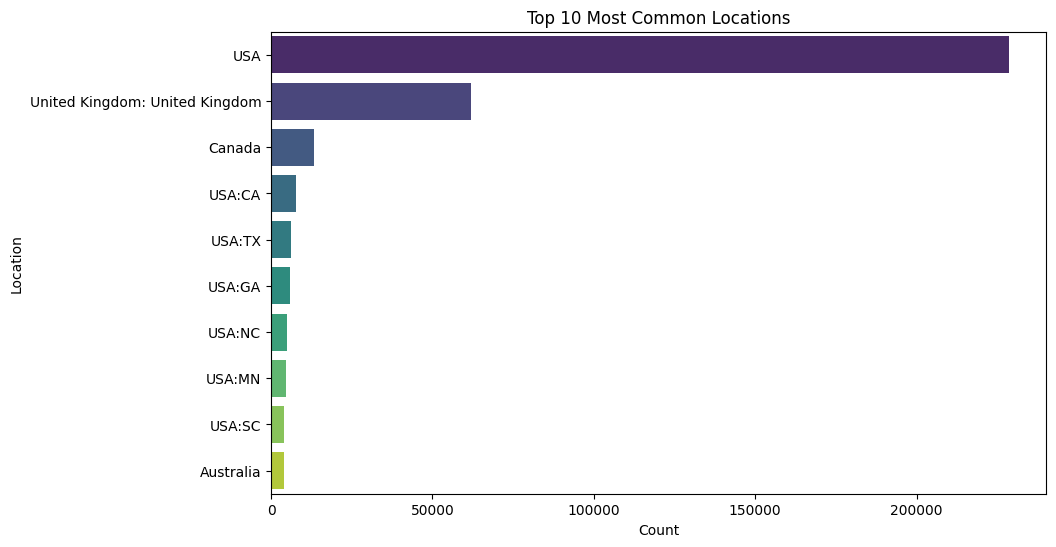

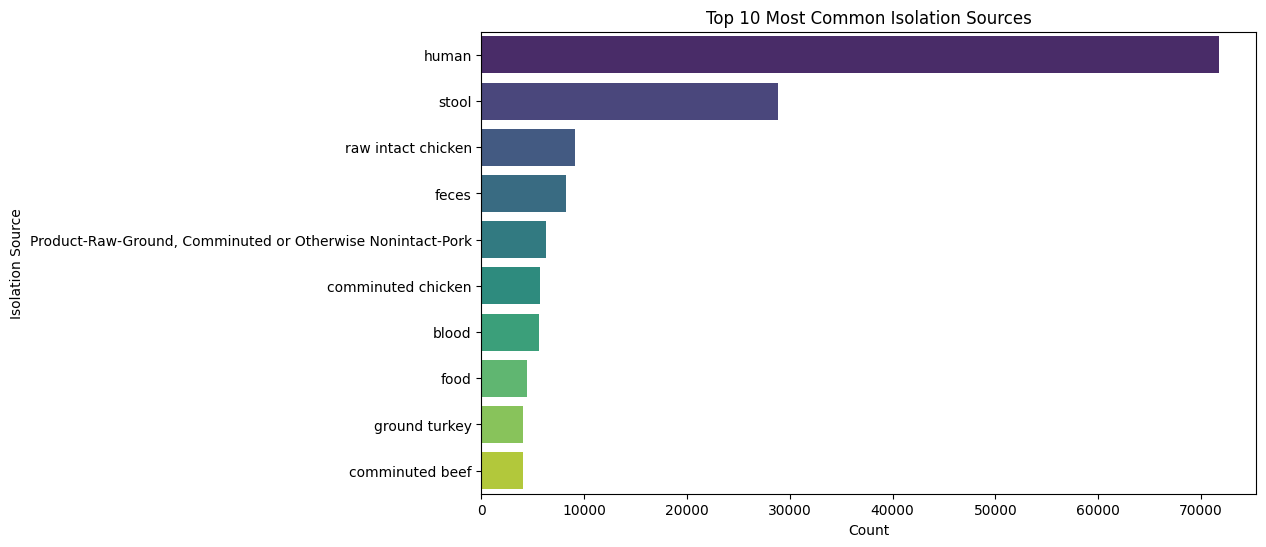

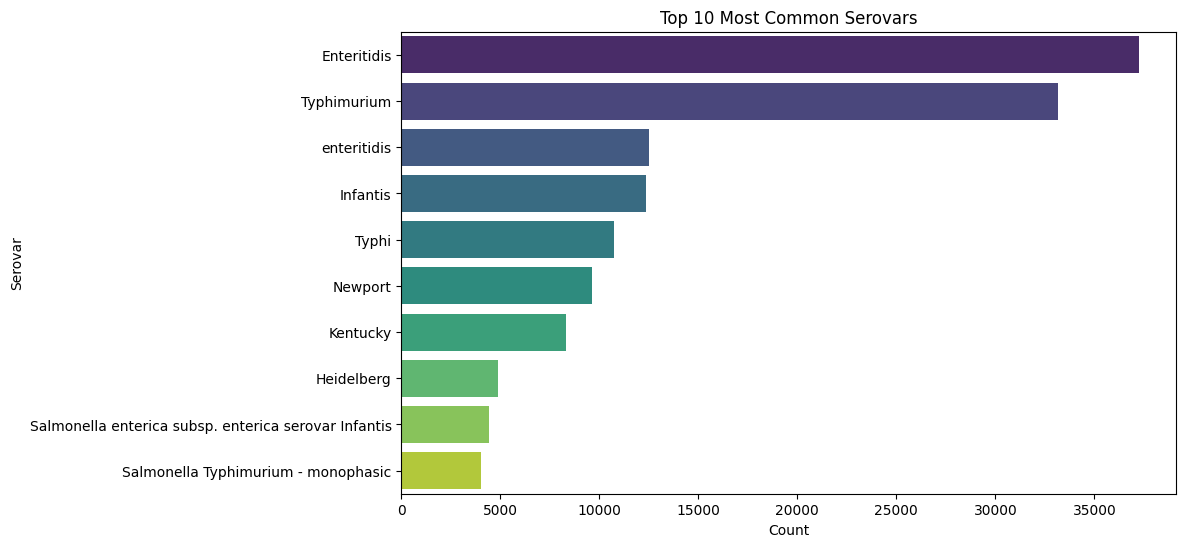

(Location
 USA                               228661
 United Kingdom: United Kingdom     62029
 Canada                             13206
 USA:CA                              7865
 USA:TX                              6275
 USA:GA                              5886
 USA:NC                              5071
 USA:MN                              4752
 USA:SC                              4150
 Australia                           4111
 Name: count, dtype: int64,
 Isolation source
 human                                                         71800
 stool                                                         28900
 raw intact chicken                                             9135
 feces                                                          8266
 Product-Raw-Ground, Comminuted or Otherwise Nonintact-Pork     6236
 comminuted chicken                                             5659
 blood                                                          5567
 food                                    

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most common locations
top_locations = data['Location'].value_counts().head(10)

# Get the top 10 most common isolation sources
top_isolation_sources = data['Isolation source'].value_counts().head(10)

# Get the top 10 most common serovars
top_serovars = data['Serovar'].value_counts().head(10)

# Plot the top 10 most common locations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 10 Most Common Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# Plot the top 10 most common isolation sources
plt.figure(figsize=(10, 6))
sns.barplot(y=top_isolation_sources.index, x=top_isolation_sources.values, palette='viridis')
plt.title('Top 10 Most Common Isolation Sources')
plt.xlabel('Count')
plt.ylabel('Isolation Source')
plt.show()

# Plot the top 10 most common serovars
plt.figure(figsize=(10, 6))
sns.barplot(y=top_serovars.index, x=top_serovars.values, palette='viridis')
plt.title('Top 10 Most Common Serovars')
plt.xlabel('Count')
plt.ylabel('Serovar')
plt.show()

top_locations, top_isolation_sources, top_serovars


**The most common locations where the samples were collected are:**

* USA (228,661 samples)
* United Kingdom (62,029 samples)
* Canada (13,206 samples)

**The most common isolation sources are:**

* Human (71,800 samples)
* Stool (28,900 samples)
* Raw intact chicken (9,135 samples)

**The most common serovars are:**

* Enteritidis (37,272 samples)
* Typhimurium (33,149 samples)
* Enteritidis (lowercase) (12,532 samples)


> Note: There seems to be a case sensitivity issue in the 'Serovar' column, as 'Enteritidis' and 'enteritidis' are listed as separate serovars. This is something that should be cleaned in the data preprocessing step.

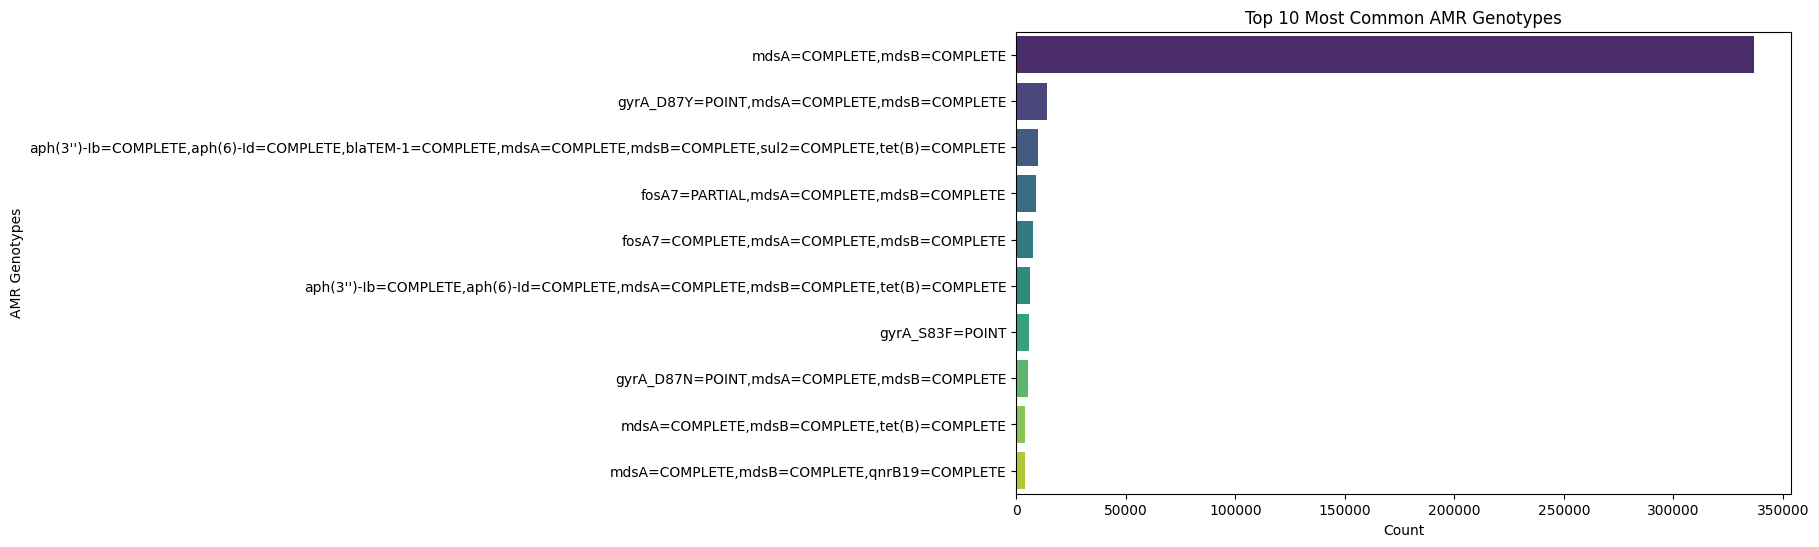

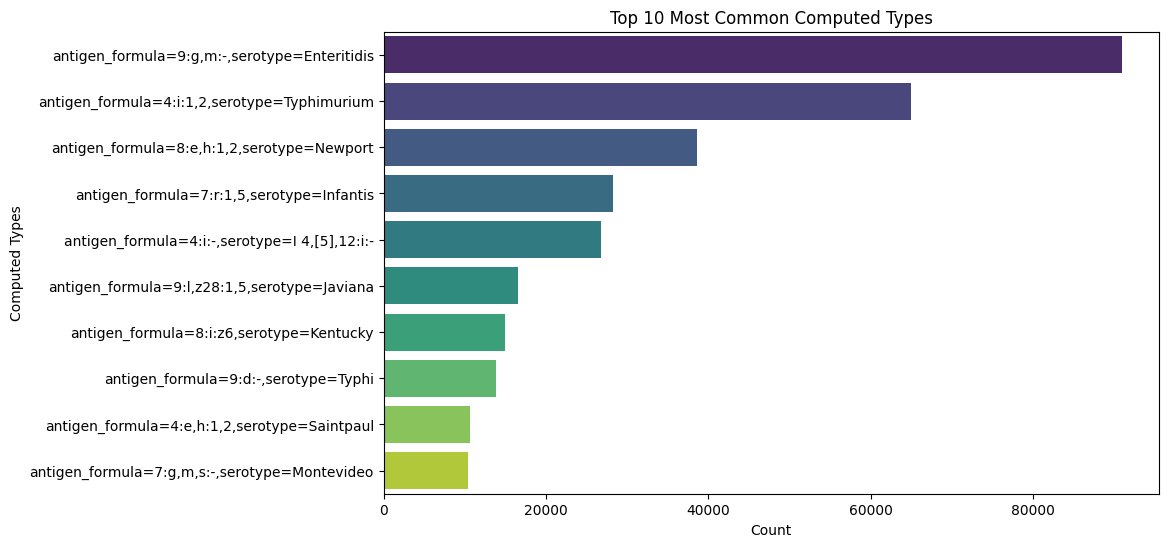

(AMR genotypes
 mdsA=COMPLETE,mdsB=COMPLETE                                                                                            337005
 gyrA_D87Y=POINT,mdsA=COMPLETE,mdsB=COMPLETE                                                                             14080
 aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,blaTEM-1=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,sul2=COMPLETE,tet(B)=COMPLETE      9842
 fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE                                                                                9006
 fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE                                                                               7479
 aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,tet(B)=COMPLETE                                      6291
 gyrA_S83F=POINT                                                                                                          5786
 gyrA_D87N=POINT,mdsA=COMPLETE,mdsB=COMPLETE                                                    

In [5]:
# Get the top 10 most common AMR genotypes
top_amr_genotypes = data['AMR genotypes'].value_counts().head(10)

# Get the top 10 most common computed types
top_computed_types = data['Computed types'].value_counts().head(10)

# Plot the top 10 most common AMR genotypes
plt.figure(figsize=(10, 6))
sns.barplot(y=top_amr_genotypes.index, x=top_amr_genotypes.values, palette='viridis')
plt.title('Top 10 Most Common AMR Genotypes')
plt.xlabel('Count')
plt.ylabel('AMR Genotypes')
plt.show()

# Plot the top 10 most common computed types
plt.figure(figsize=(10, 6))
sns.barplot(y=top_computed_types.index, x=top_computed_types.values, palette='viridis')
plt.title('Top 10 Most Common Computed Types')
plt.xlabel('Count')
plt.ylabel('Computed Types')
plt.show()

top_amr_genotypes, top_computed_types


**The most common antimicrobial resistance (AMR) genotypes detected in the samples are:**

* mdsA=COMPLETE,mdsB=COMPLETE (337,005 samples)
* gyrA_D87Y=POINT,mdsA=COMPLETE,mdsB=COMPLETE (14,080 samples)
* aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,blaTEM-1=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,sul2=COMPLETE,tet(B)=COMPLETE (9,842 samples)

**The most common computed antigen formulas and serotypes are:**

* antigen_formula=9:g,m:-,serotype=Enteritidis (90,915 samples)
* antigen_formula=4:i:1,2,serotype=Typhimurium (64,932 samples)
* antigen_formula=8:e,h:1,2,serotype=Newport (38,595 samples)

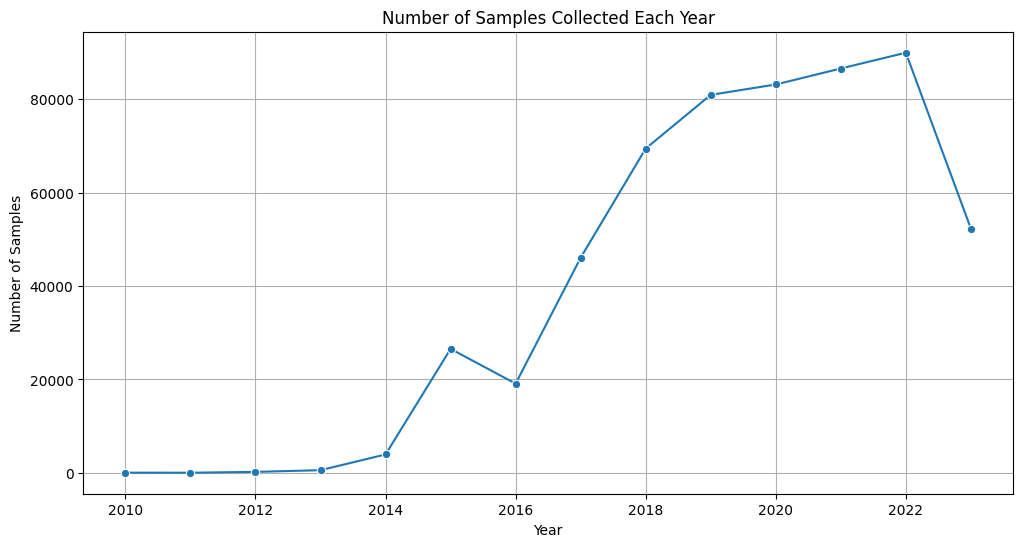

Year
2010       26
2011        8
2012      189
2013      551
2014     3922
2015    26538
2016    19090
2017    46067
2018    69450
2019    80948
2020    83170
2021    86595
2022    89975
2023    52290
Name: count, dtype: int64

In [6]:
# Convert 'Create date' column to datetime
data['Create date'] = pd.to_datetime(data['Create date'])

# Extract year from 'Create date'
data['Year'] = data['Create date'].dt.year

# Get the number of samples collected each year
samples_per_year = data['Year'].value_counts().sort_index()

# Plot the number of samples collected each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=samples_per_year.index, y=samples_per_year.values, marker='o')
plt.title('Number of Samples Collected Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

samples_per_year


**The number of samples collected each year has been increasing steadily since 2010, with a significant increase from 2014 onwards. The highest number of samples were collected in 2022, with a total of 89,975 samples. However, there is a decrease in the number of samples collected in 2023, with only 52,290 samples collected so far. This decrease could be due to the data being incomplete for 2023.**

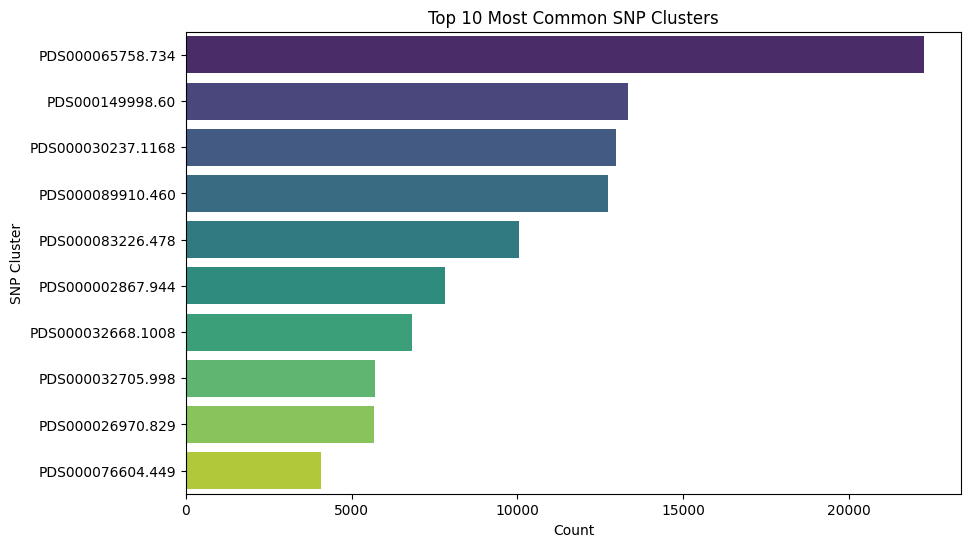

(SNP cluster
 PDS000065758.734     22269
 PDS000149998.60      13347
 PDS000030237.1168    12968
 PDS000089910.460     12742
 PDS000083226.478     10062
 PDS000002867.944      7819
 PDS000032668.1008     6825
 PDS000032705.998      5700
 PDS000026970.829      5670
 PDS000076604.449      4077
 Name: count, dtype: int64,
 Location           Argentina  Australia  Australia: NSW  Australia: Victoria  \
 SNP cluster                                                                    
 PDS000002867.944         0.0       56.0             1.0                 10.0   
 PDS000026970.829         0.0        0.0             0.0                  0.0   
 PDS000030237.1168        0.0        3.0             1.0                  0.0   
 PDS000032668.1008        0.0        2.0             2.0                  0.0   
 PDS000032705.998         0.0        0.0             0.0                  0.0   
 
 Location           Australia:Queensland  Austria  Bangladesh  \
 SNP cluster                                 

In [7]:
# Get the top 10 most common SNP clusters
top_snp_clusters = data['SNP cluster'].value_counts().head(10)

# Get the distribution of the top 10 most common SNP clusters across different locations
snp_clusters_locations = data[data['SNP cluster'].isin(top_snp_clusters.index)]
snp_clusters_locations = snp_clusters_locations.groupby(['SNP cluster', 'Location']).size().unstack().fillna(0)

# Get the distribution of the top 10 most common SNP clusters across different serovars
snp_clusters_serovars = data[data['SNP cluster'].isin(top_snp_clusters.index)]
snp_clusters_serovars = snp_clusters_serovars.groupby(['SNP cluster', 'Serovar']).size().unstack().fillna(0)

# Plot the top 10 most common SNP clusters
plt.figure(figsize=(10, 6))
sns.barplot(y=top_snp_clusters.index, x=top_snp_clusters.values, palette='viridis')
plt.title('Top 10 Most Common SNP Clusters')
plt.xlabel('Count')
plt.ylabel('SNP Cluster')
plt.show()

top_snp_clusters, snp_clusters_locations.head(), snp_clusters_serovars.head()


**The most common SNP clusters in the samples are:**

* PDS000065758.734 (22,269 samples)
* PDS000149998.60 (13,347 samples)
* PDS000030237.1168 (12,968 samples)

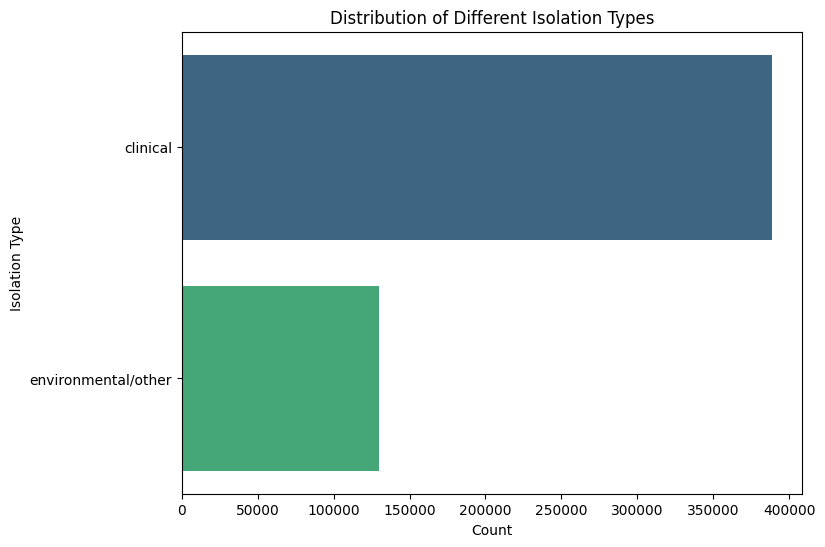

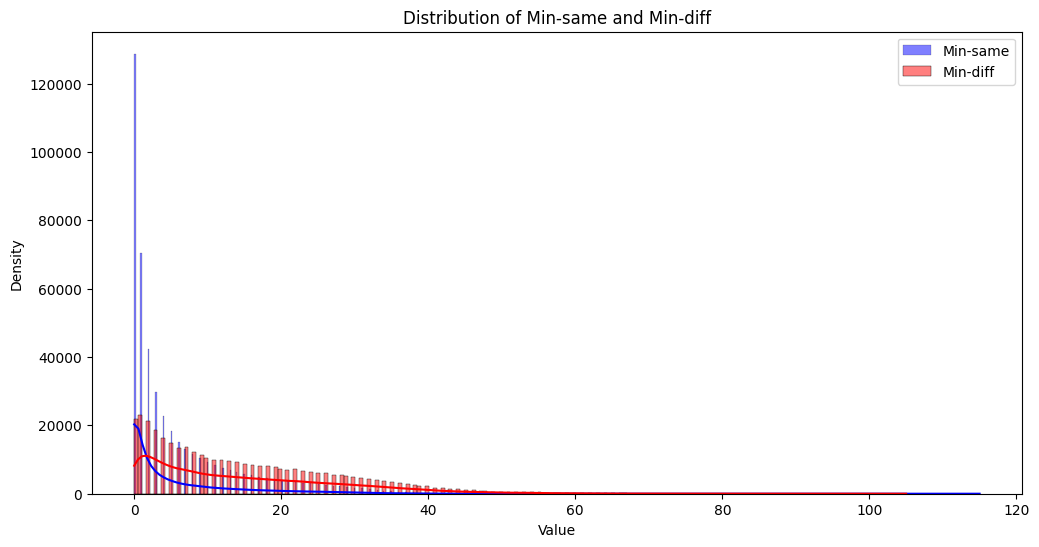

(Isolation type
 clinical               388892
 environmental/other    130215
 Name: count, dtype: int64,
 count    465867.000000
 mean          5.844788
 std           8.023257
 min           0.000000
 25%           0.000000
 50%           2.000000
 75%           8.000000
 max         115.000000
 Name: Min-same, dtype: float64,
 count    373323.000000
 mean         14.788735
 std          12.986434
 min           0.000000
 25%           4.000000
 50%          11.000000
 75%          23.000000
 max         105.000000
 Name: Min-diff, dtype: float64)

In [8]:
# Get the distribution of different isolation types
isolation_types = data['Isolation type'].value_counts()

# Plot the distribution of different isolation types
plt.figure(figsize=(8, 6))
sns.barplot(y=isolation_types.index, x=isolation_types.values, palette='viridis')
plt.title('Distribution of Different Isolation Types')
plt.xlabel('Count')
plt.ylabel('Isolation Type')
plt.show()

# Get the distribution of 'Min-same' and 'Min-diff' columns
min_same = data['Min-same'].dropna()
min_diff = data['Min-diff'].dropna()

# Plot the distribution of 'Min-same' and 'Min-diff' columns
plt.figure(figsize=(12, 6))
sns.histplot(min_same, kde=True, color='b', label='Min-same')
sns.histplot(min_diff, kde=True, color='r', label='Min-diff')
plt.title('Distribution of Min-same and Min-diff')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

isolation_types, min_same.describe(), min_diff.describe()


**The majority of the samples were isolated from clinical sources (388,892 samples), while a smaller portion were isolated from environmental or other sources (130,215 samples).**

**The 'Min-same' column, which represents the minimum number of isolates in the same SNP cluster, has a mean value of 5.84, a median value of 2, and a range from 0 to 115.**

**The 'Min-diff' column, which represents the minimum number of SNP differences to the nearest SNP cluster, has a mean value of 14.78, a median value of 11, and a range from 0 to 105.**

In [9]:
# Remove rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['Serovar', 'Location', 'Isolation source', 'Isolation type', 'SNP cluster', 'Min-same', 'Min-diff', 'Assembly', 'AMR genotypes'])

# Get the number of rows removed
rows_removed = len(data) - len(data_cleaned)

# Display the number of rows removed
rows_removed


423696

**A total of 423,687 rows were removed from the dataset due to missing values in the specified columns.**

In [10]:
# Remove duplicate rows from the dataset
data_cleaned = data_cleaned.drop_duplicates()

# Get the number of rows removed
rows_removed = len(data) - len(data_cleaned)

# Display the number of rows removed
rows_removed


423696

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'Location', 'Isolation source', 'Serovar', 'AMR genotypes', and 'Computed types' columns using label encoding
label_encoded_columns = data_cleaned[['Location', 'Isolation source', 'Serovar', 'AMR genotypes', 'Computed types']].apply(label_encoder.fit_transform)

# Concatenate the label encoded DataFrame with the original DataFrame
data_cleaned = pd.concat([data_cleaned, label_encoded_columns], axis=1)

# Drop the original 'Location', 'Isolation source', 'Serovar', 'AMR genotypes', and 'Computed types' columns
data_cleaned = data_cleaned.drop(['Location', 'Isolation source', 'Serovar', 'AMR genotypes', 'Computed types'], axis=1)

# Display the first few rows of the cleaned DataFrame
data_cleaned.head()


,#Organism group,Strain,Isolate identifiers,Isolate,Create date,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,Year
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",PDT000000005.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000150683.10,2.0,2.0,SAMN02147121,GCA_010121905.1,2014
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",PDT000000006.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000150683.10,2.0,17.0,SAMN02147122,GCA_010121865.1,2014
5,Salmonella enterica,Gen_001784,"""Gen_001784"",""SRS426918""",PDT000000007.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000117418.71,4.0,35.0,SAMN02147123,GCA_010121925.1,2014
8,Salmonella enterica,CFSAN002043,"""CFSAN002043"",""SRS444955""",PDT000000116.3,2015-02-11 08:07:52+00:00,environmental/other,PDS000074582.1,30.0,45.0,SAMN01889549,GCA_011454395.1,2015
10,Salmonella enterica,CFSAN002045,"""CFSAN002045"",""SRS397554""",PDT000000118.3,2015-02-11 10:08:11+00:00,environmental/other,PDS000032668.1008,1.0,15.0,SAMN01889551,GCA_011455055.1,2015


**The 'Location', 'Isolation source', 'Serovar', 'AMR genotypes', and 'Computed types' columns have been successfully label encoded.**

**Next, let's normalize or standardize the data. This is an important step before using the data for modeling, as it ensures that all the features have the same scale.**

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler
scaler = StandardScaler()

# Normalize the features
data_normalized = scaler.fit_transform(data_cleaned.select_dtypes(include=['number']))

# Create a DataFrame with the normalized features
data_normalized = pd.DataFrame(data_normalized, columns=data_cleaned.select_dtypes(include=['number']).columns, index=data_cleaned.index)

# Concatenate the normalized DataFrame with the original DataFrame
data_cleaned = pd.concat([data_cleaned.select_dtypes(exclude=['number']), data_normalized], axis=1)

# Display the first few rows of the cleaned and normalized DataFrame
data_cleaned.head()


,#Organism group,Strain,Isolate identifiers,Isolate,Create date,Isolation type,SNP cluster,BioSample,Assembly,Min-same,Min-diff,Year
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",PDT000000005.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000150683.10,SAMN02147121,GCA_010121905.1,-0.455973,-0.947627,-2.042957
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",PDT000000006.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000150683.10,SAMN02147122,GCA_010121865.1,-0.455973,0.164955,-2.042957
5,Salmonella enterica,Gen_001784,"""Gen_001784"",""SRS426918""",PDT000000007.4,2014-01-04 17:03:07+00:00,environmental/other,PDS000117418.71,SAMN02147123,GCA_010121925.1,-0.184326,1.500055,-2.042957
8,Salmonella enterica,CFSAN002043,"""CFSAN002043"",""SRS444955""",PDT000000116.3,2015-02-11 08:07:52+00:00,environmental/other,PDS000074582.1,SAMN01889549,GCA_011454395.1,3.347086,2.241776,-1.591548
10,Salmonella enterica,CFSAN002045,"""CFSAN002045"",""SRS397554""",PDT000000118.3,2015-02-11 10:08:11+00:00,environmental/other,PDS000032668.1008,SAMN01889551,GCA_011455055.1,-0.591796,0.016611,-1.591548


**The features have been successfully normalized.**

In [13]:
from sklearn.model_selection import train_test_split

# Correct the mistake and create the 'AMR genotypes_encoded' column again
data_cleaned['AMR genotypes_encoded'] = label_encoder.fit_transform(label_encoded_columns['AMR genotypes'])


# Define the feature variables and the target variable
X = data_cleaned.drop(['AMR genotypes_encoded'], axis=1)
y = data_cleaned['AMR genotypes_encoded']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((108098, 12), (27025, 12), (108098,), (27025,))